Importing the libraries
- used this as a tutorial: https://www.tensorflow.org/tutorials/images/classification

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential

Creating the dataset

In [115]:
batch_size = 64
img_size = 100
data_dir = "./chess"

In [116]:
os.listdir('.')

['.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 'Chess',
 'cnn.ipynb',
 'PCTest']

In [117]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch_size)

Found 553 files belonging to 6 classes.
Using 443 files for training.


In [118]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch_size)

Found 553 files belonging to 6 classes.
Using 110 files for validation.


In [119]:
class_names = train_ds.class_names
print(class_names)

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


Building A Neural Network Model

In [167]:
num_classes = len(class_names)
reg = regularizers.l2(0.01)
img_shape = (img_size, img_size, 3)

model = Sequential([
   layers.RandomFlip('horizontal', input_shape=img_shape),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
    layers.Rescaling(1./255, input_shape=img_shape),
    layers.Conv2D(16, (3,3), padding='same', activation='relu', kernel_regularizer=reg, bias_regularizer=reg),
    layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=reg, bias_regularizer=reg),
    layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=reg, bias_regularizer=reg),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=reg, bias_regularizer=reg),
    layers.Dense(num_classes, activation='softmax')
])

In [168]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_22 (RandomFlip)  (None, 100, 100, 3)      0         
                                                                 
 rescaling_22 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_65 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                

In [169]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
for image_batch, labels_batch in val_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 100, 100, 3)
(64,)
(64, 100, 100, 3)
(64,)


In [170]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])


In [171]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
7/7 [==============================] - 3s 255ms/step - loss: 4.3703 - accuracy: 0.2009 - val_loss: 3.6220 - val_accuracy: 0.2091
Epoch 2/30
7/7 [==============================] - 3s 253ms/step - loss: 3.2238 - accuracy: 0.2393 - val_loss: 2.8118 - val_accuracy: 0.2545
Epoch 3/30
7/7 [==============================] - 3s 240ms/step - loss: 2.5935 - accuracy: 0.2844 - val_loss: 2.4059 - val_accuracy: 0.2364
Epoch 4/30
7/7 [==============================] - 3s 246ms/step - loss: 2.2553 - accuracy: 0.3612 - val_loss: 2.1992 - val_accuracy: 0.2909
Epoch 5/30
7/7 [==============================] - 3s 271ms/step - loss: 2.0947 - accuracy: 0.3589 - val_loss: 2.1408 - val_accuracy: 0.2909
Epoch 6/30
7/7 [==============================] - 3s 227ms/step - loss: 1.9981 - accuracy: 0.3657 - val_loss: 2.0356 - val_accuracy: 0.3818
Epoch 7/30
7/7 [==============================] - 3s 235ms/step - loss: 1.9166 - accuracy: 0.4379 - val_loss: 2.0497 - val_accuracy: 0.3455
Epoch 8/30
7/7 [====

In [172]:
accuracy = history.history['accuracy']
print(accuracy)

[0.20090293884277344, 0.239277645945549, 0.284424364566803, 0.3611738085746765, 0.3589164912700653, 0.3656884729862213, 0.43792325258255005, 0.4853273034095764, 0.5169300436973572, 0.4920993149280548, 0.5395033955574036, 0.5778781175613403, 0.6297968626022339, 0.6275395154953003, 0.6636568903923035, 0.6433408856391907, 0.722347617149353, 0.7088035941123962, 0.6997742652893066, 0.7246049642562866, 0.7539503574371338, 0.7923250794410706, 0.765237033367157, 0.7878103852272034, 0.8352144360542297, 0.8374717831611633, 0.8374717831611633, 0.8645598292350769, 0.8510158061981201, 0.8690744638442993]


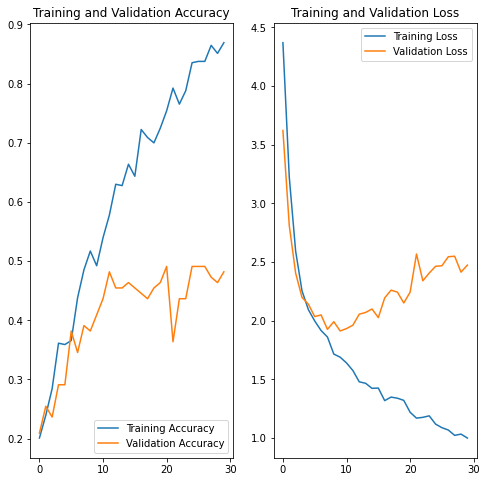

In [173]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
